In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read the Data
data=pd.read_csv('Suicides in India 2001-2012.csv', encoding= 'unicode_escape')

In [4]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [5]:
#Find the size of the data Rows x Columns
data.shape

(237519, 7)

In [6]:
#check for duplicate data
data.duplicated().any()

False

In [7]:
len(data[data['Total'] == 0])

135481

In [8]:
#Find Basic Statistics like count, mean, standard deviation, min, max etc.
data.describe(include='all')

,State,Year,Type_code,Type,Gender,Age_group,Total
count,237519,237519.000000,237519,237519,237519,237519,237519.000000
unique,38,NaN,5,69,2,6,NaN
top,Maharashtra,NaN,Causes,Others (Please Specify),Male,15-29,NaN
freq,6792,NaN,109200,7263,118879,45223,NaN
mean,NaN,2006.500448,NaN,NaN,NaN,NaN,55.034477
std,NaN,3.452240,NaN,NaN,NaN,NaN,792.749038
min,NaN,2001.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,2004.000000,NaN,NaN,NaN,NaN,0.000000
50%,NaN,2007.000000,NaN,NaN,NaN,NaN,0.000000
75%,NaN,2010.000000,NaN,NaN,NaN,NaN,6.000000


In [9]:
#Find the information about the fields, field datatypes and Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 8.2+ MB


In [10]:
#Age group count
data.Age_group.value_counts()

15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    11856
Name: Age_group, dtype: int64

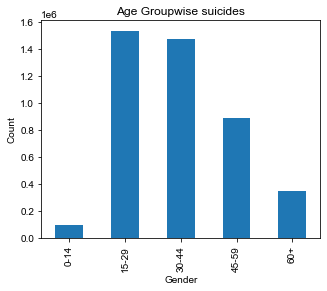

In [11]:
age_grp_plot=data[data['Age_group']!='0-100+']
age_grp_plot=age_grp_plot.groupby('Age_group').sum()['Total'].plot(kind='bar', figsize=(5,4), title ="Age Groupwise suicides");
age_grp_plot.set_xlabel('Gender')
age_grp_plot.set_ylabel('Count')
sns.set_style('whitegrid')

- Max suicides are between the age group of 15-44

In [12]:
#missing values
data.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [13]:
#Taking a look at the counts of 'Type_code'
data['Type_code'].value_counts()

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          7296
Social_Status             4560
Name: Type_code, dtype: int64

In [14]:
data['State'].value_counts()

Maharashtra          6792
Karnataka            6792
Madhya Pradesh       6792
Andhra Pradesh       6791
Odisha               6791
Rajasthan            6791
Haryana              6790
Chhattisgarh         6790
Bihar                6790
Kerala               6788
Uttar Pradesh        6787
Tamil Nadu           6786
Assam                6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (Uts)           312
Total (States)        312
Name: State,

In [15]:
#total no. of states in the list
data.Year.value_counts().size

12

In [16]:
#  list of Years
print(data['Year'].unique())

[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012]


In [17]:
# rename states

data.replace('A & N Islands (Ut)', 'A & N Islands', inplace=True)
data.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
data.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace=True)
data.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
data.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
data.replace('Delhi (Ut)', 'Delhi', inplace=True)

In [18]:
# rename Type

data.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
data.replace('By Other means (please specify)', 'By Other means', inplace=True)
data.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency', inplace=True)

In [19]:
# Drop rows where total is zero.

data = data.drop(data[data.Total==0].index)

In [20]:
data[data['Total']==0]

,State,Year,Type_code,Type,Gender,Age_group,Total


In [21]:
#Find the size of the data Rows x Columns now
data.shape

(102038, 7)

In [22]:
data = data.drop(data[(data.State == 'Total (Uts)') | (data.State == 'Total (All India)') | 
               (data.State == 'Total (States)')].index)

In [23]:
data['State'].value_counts()

Andhra Pradesh       5185
Karnataka            5115
Tamil Nadu           5054
Madhya Pradesh       5029
Maharashtra          4958
Uttar Pradesh        4954
Gujarat              4856
West Bengal          4596
Kerala               4509
Chhattisgarh         4368
Rajasthan            4324
Odisha               4179
Assam                3868
Haryana              3826
Delhi                3324
Jharkhand            3210
Bihar                3119
Punjab               2960
Himachal Pradesh     2650
Tripura              2451
Uttarakhand          2442
Goa                  2237
Jammu & Kashmir      2159
Puducherry           2124
Sikkim               1421
A & N Islands        1299
Meghalaya            1180
Chandigarh           1092
Arunachal Pradesh    1062
D & N Haveli          952
Mizoram               786
Manipur               609
Nagaland              587
Daman & Diu           579
Lakshadweep            46
Name: State, dtype: int64

In [24]:
#Gender Suicide Frequency
data.groupby('Gender').sum()['Total']

Gender
Female    2606922
Male      4641088
Name: Total, dtype: int64

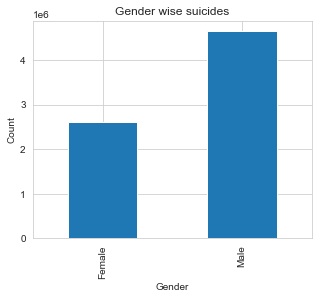

In [25]:
#Gender Suicide Frequency Plot
gender = data.groupby('Gender').sum()['Total'].plot(kind='bar', figsize=(5,4), title ="Gender wise suicides");
gender.set_xlabel('Gender')
gender.set_ylabel('Count')
sns.set_style('whitegrid')

In [26]:
# Age Suicide Frequency
data_Age = data[data['Age_group']!='0-100+']
data_Age.groupby('Age_group').sum()['Total']

Age_group
0-14       98410
15-29    1534037
30-44    1471599
45-59     885177
60+       346925
Name: Total, dtype: int64

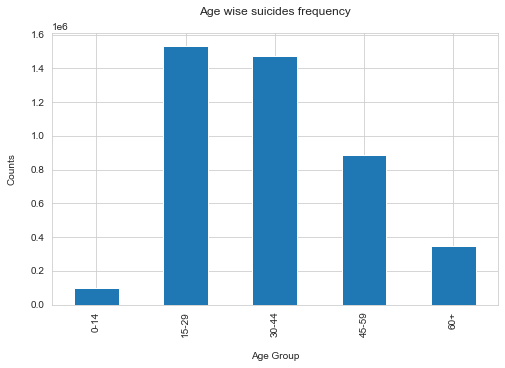

In [27]:
# Age Suicide Frequency Plot
data_Age = data[data['Age_group']!='0-100+']

age = data_Age.groupby('Age_group').sum()['Total'].plot(kind='bar',figsize=(8,5), title ="Age wise suicides frequency\n");
age.set_xlabel('\nAge Group')
age.set_ylabel('Counts\n')
sns.set_style('whitegrid')

In [28]:
# Suicide rate every year

data.groupby('Year').sum()['Total']

Year
2001    542440
2002    551980
2003    554218
2004    568349
2005    569545
2006    590543
2007    613119
2008    625014
2009    635429
2010    672926
2011    677159
2012    647288
Name: Total, dtype: int64

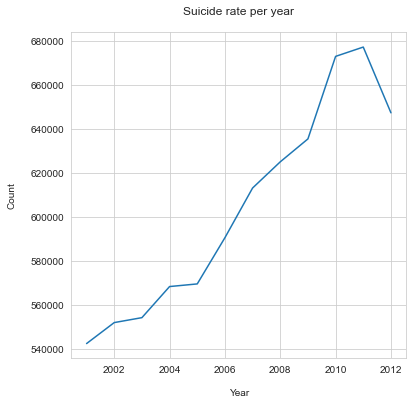

In [29]:
# Suicide rate every year plot

year = data.groupby('Year').sum()['Total'].plot(kind='line', figsize=(6,6), title = 'Suicide rate per year\n');
year.set_xlabel('\nYear')
year.set_ylabel('Count\n')
sns.set_style('whitegrid');

In [30]:
# State wise Suicide count

data.groupby('State').sum()['Total'].sort_values(ascending = False)

State
Maharashtra          901945
West Bengal          849936
Tamil Nadu           818691
Andhra Pradesh       814059
Karnataka            734825
Kerala               538946
Madhya Pradesh       451535
Gujarat              330858
Chhattisgarh         302354
Odisha               267234
Rajasthan            255134
Uttar Pradesh        233352
Assam                172276
Haryana              147176
Delhi                 84272
Jharkhand             49720
Punjab                46350
Bihar                 46214
Tripura               45965
Puducherry            32144
Himachal Pradesh      26562
Uttarakhand           18496
Goa                   17363
Jammu & Kashmir       14821
Sikkim                 9606
A & N Islands          8109
Arunachal Pradesh      6633
Meghalaya              5415
Chandigarh             5164
Mizoram                4154
D & N Haveli           3430
Manipur                2102
Nagaland               1728
Daman & Diu            1391
Lakshadweep              50
Name: Total, d

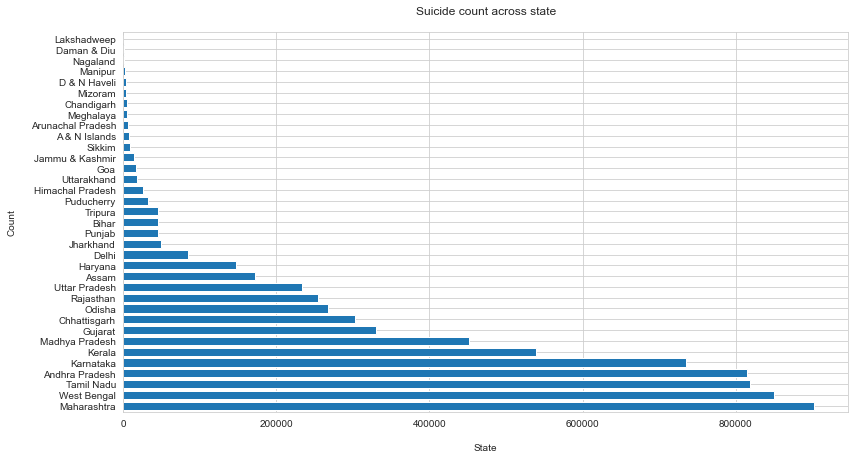

In [31]:
# State wise Suicide count plot

state = data.groupby('State').sum()['Total']
sort_state = state.sort_values(ascending = False)
state_fig = sort_state.plot(kind='barh', figsize = (13,7), title = 'Suicide count across state\n', width = 0.75)
state_fig.set_xlabel('\nState')
state_fig.set_ylabel('Count\n')
sns.set_style('whitegrid')
sns.set_palette('Set2');

In [32]:
# split dataset using type code

cause = data[data['Type_code'] == 'Causes']
edu_status = data[data['Type_code'] == 'Education_Status']
means_adpt = data[data['Type_code'] == 'Means_adopted']
prof = data[data['Type_code'] == 'Professional_Profile']
soc_status = data[data['Type_code'] == 'Social_Status']

In [33]:
# function to plot

def plot_type(data, Title, X_lab):
    p_type = data.groupby('Type').sum()['Total']
    sort_data = p_type.sort_values(ascending = False)

    fig = sort_data.plot(kind='bar', figsize = (10,6), title = Title + '\n', width = 0.75)
    fig.set_xlabel('\n' + X_lab )
    fig.set_ylabel('Count\n')
    sns.set_style('whitegrid')
    sns.set_palette('Set2');

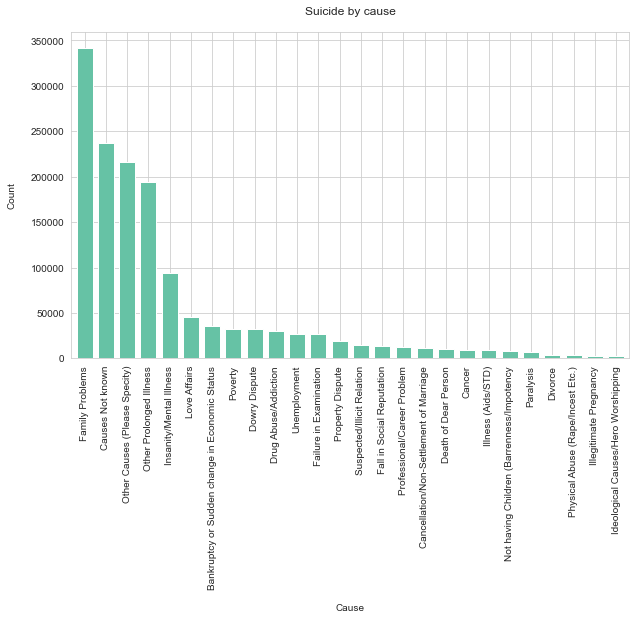

In [34]:
# plot by cause
plot_type(cause, 'Suicide by cause', 'Cause')

- Most of the cause are unknown but Family problems and Prolonged illness is at the top

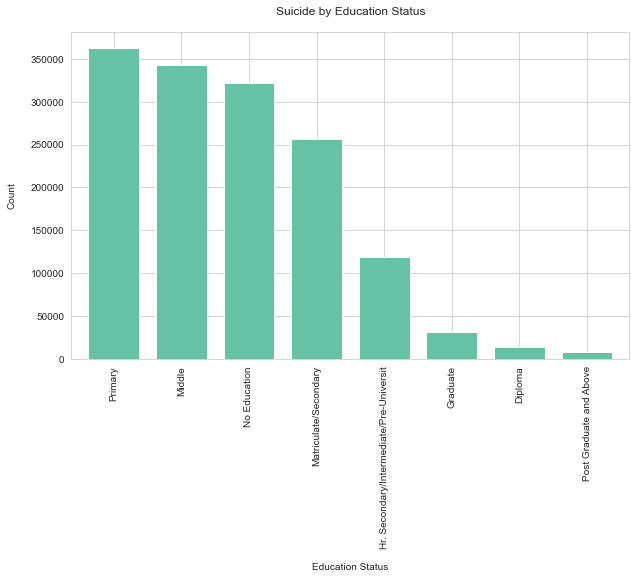

In [35]:
# plot by Education Status
plot_type(edu_status, 'Suicide by Education Status', 'Education Status')

- People with primary or no education are high in number

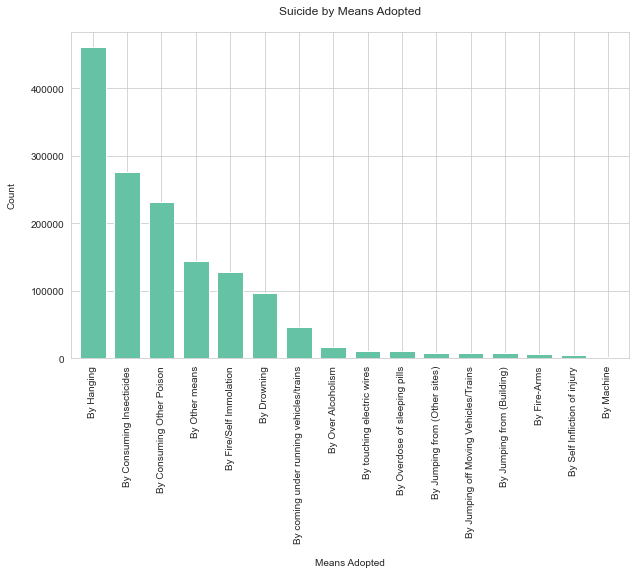

In [36]:
# plot by means adopted
plot_type(means_adpt, 'Suicide by Means Adopted', 'Means Adopted')

- Hanging, Consuming Insecticides is more common but, most of other means are unknown

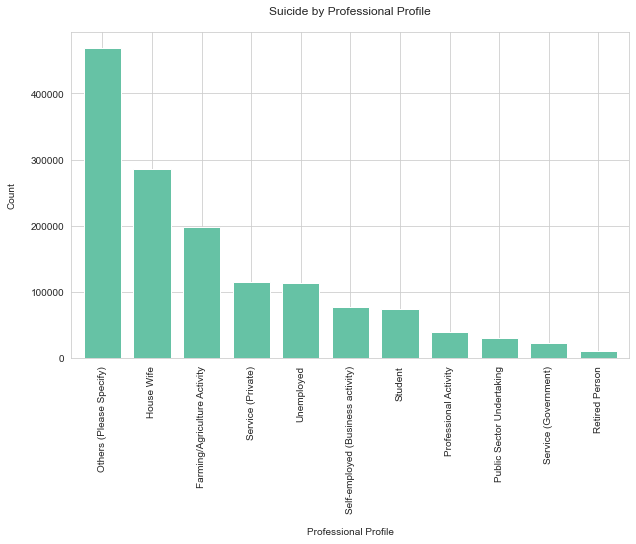

In [37]:
# suicide by professional profile
plot_type(prof, 'Suicide by Professional Profile', 'Professional Profile')

- Most of the professional profile is unknown but house wife comes in second

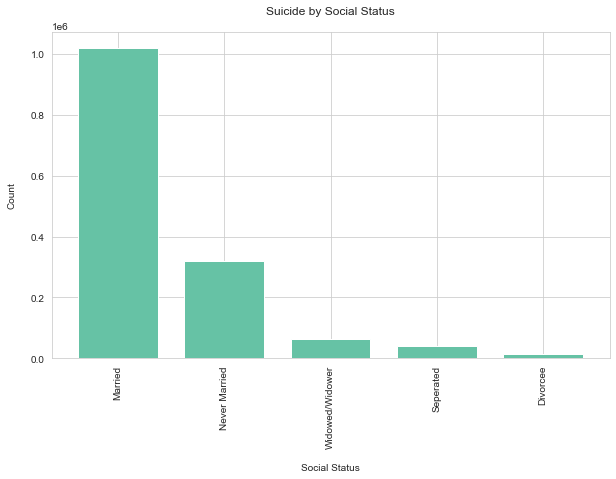

In [38]:
# suicide by social Status
plot_type(soc_status, 'Suicide by Social Status', 'Social Status')

- Family Problems, Never Married these are at the top when it comes to the cause, professional profile and social status respectively

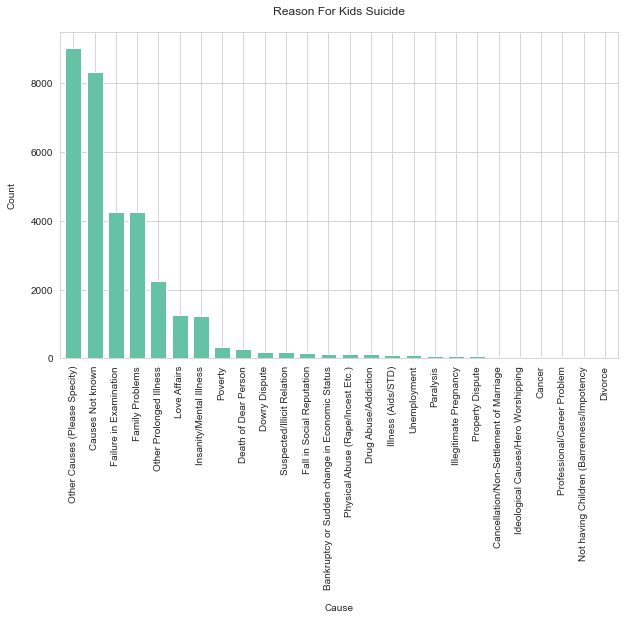

In [39]:
age_lower = data[data['Age_group']== '0-14']
age_lower_cause = age_lower[age_lower['Type_code'] == 'Causes']
plot_type(age_lower_cause, 'Reason For Kids Suicide', 'Cause')

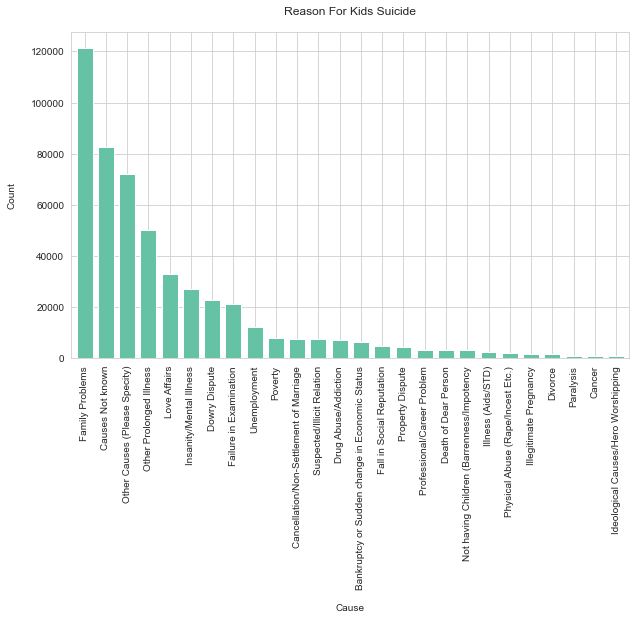

In [40]:
age_middle = data[data['Age_group']== '15-29']
age_middle_cause = age_middle[age_middle['Type_code'] == 'Causes']
plot_type(age_middle_cause, 'Reason For Kids Suicide', 'Cause')

- Family Problems, Illness and Love affairs are at the top while, most of the reasons are unknown yet

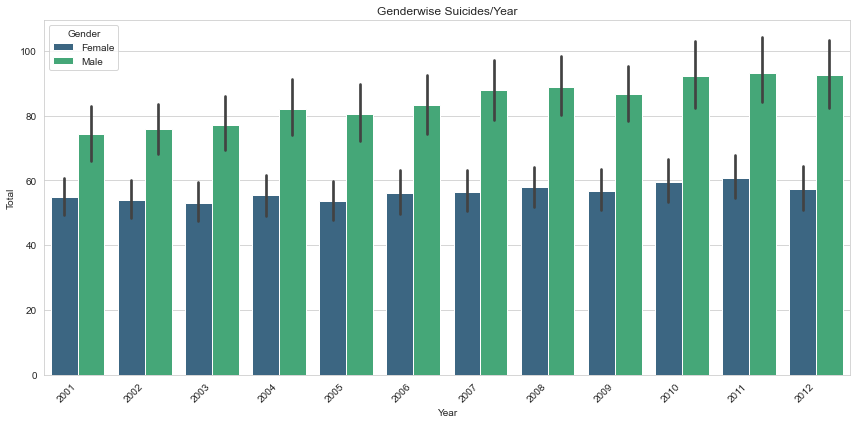

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year',y='Total',hue='Gender',data=data[['Year','Total','Gender']],palette='viridis')
plt.xticks(rotation=45,ha='right') #rotation=inclination of the text (xlabel)
plt.title('Genderwise Suicides/Year') 
plt.tight_layout()

- In any given year, male suicide rate is much higher than the female's
- Female and male suicide rate was highest in 2011

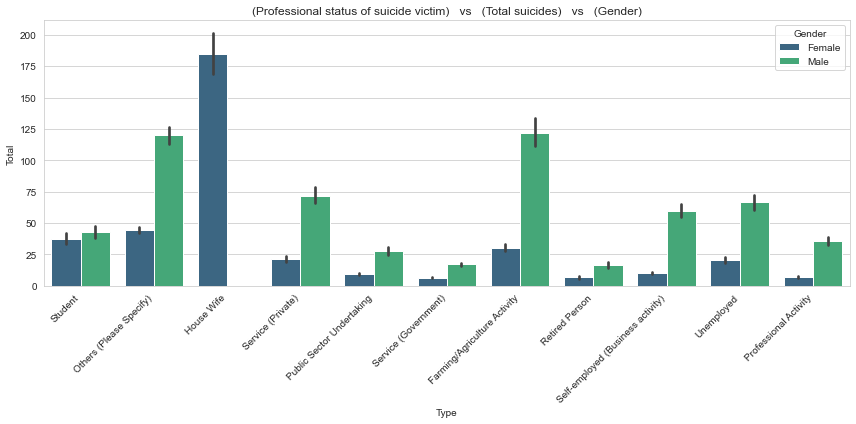

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=prof,palette='viridis')
plt.xticks(rotation=45,ha='right') #rotation=inclination of the text (xlabel)
plt.title('(Professional status of suicide victim)   vs   (Total suicides)   vs   (Gender)') 
plt.tight_layout()

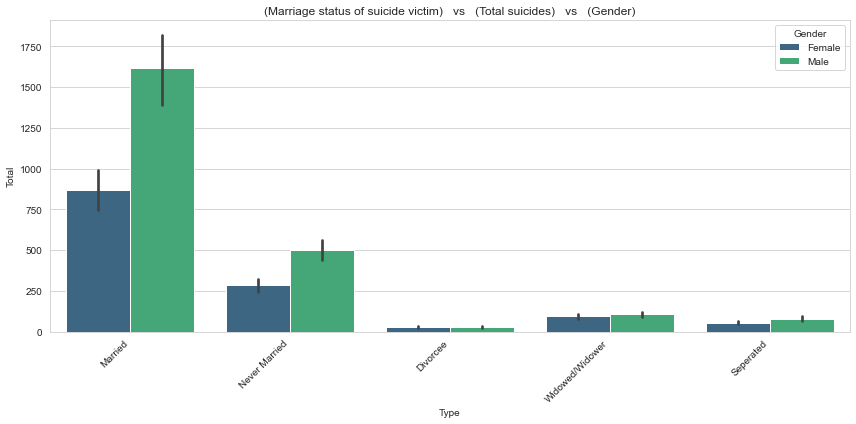

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=soc_status,palette='viridis')
plt.xticks(rotation=45,ha='right') #rotation=inclination of the text (xlabel)
plt.title('(Marriage status of suicide victim)   vs   (Total suicides)   vs   (Gender)') 
plt.tight_layout()

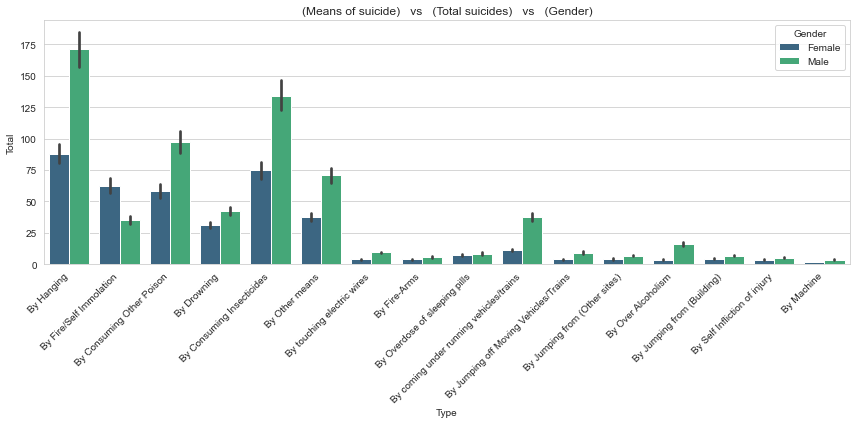

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=means_adpt,palette='viridis')
plt.xticks(rotation=45,ha='right') #rotation=inclination of the text (xlabel)
plt.title('(Means of suicide)   vs   (Total suicides)   vs   (Gender)') 
plt.tight_layout()

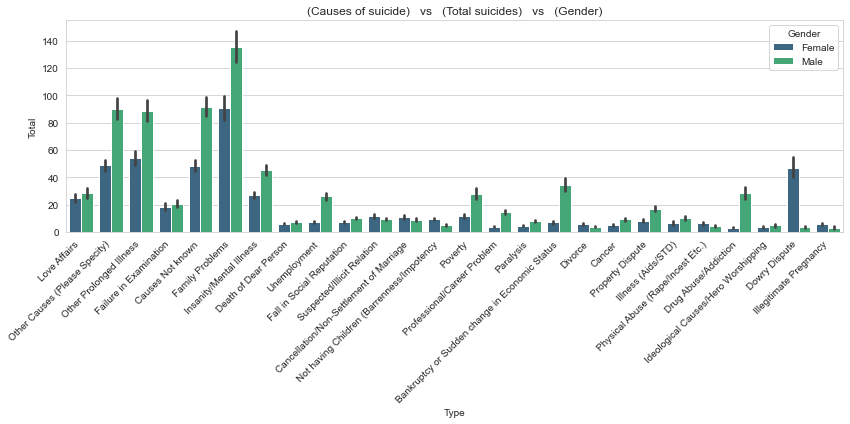

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=cause,palette='viridis')
plt.xticks(rotation=45,ha='right') #rotation=inclination of the text (xlabel)
plt.title('(Causes of suicide)   vs   (Total suicides)   vs   (Gender)') 
plt.tight_layout()

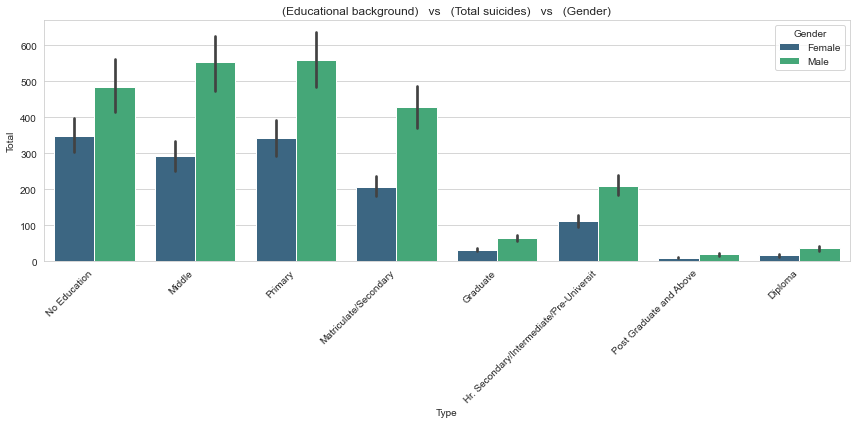

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=edu_status,palette='viridis')
plt.xticks(rotation=45,ha='right') #rotation=inclination of the text (xlabel)
plt.title('(Educational background)   vs   (Total suicides)   vs   (Gender)') 
plt.tight_layout()

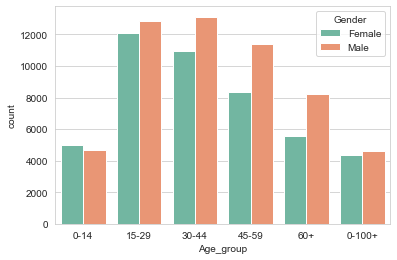

In [49]:
# Genderwise Age-group suicide rate
sns.countplot(x="Age_group", hue="Gender", data=data)
plt.show()

### Conclusion

- Age group between 15-44 has the highest number of suicides
- Rate of suicide sky rocketed from 2002-2010 but since 2011 it has been decreasing 
- Maharashtra, West Bengal and Tamil Nadu have the highest suicide rate
- Family Problems, Illness, Mental Illness are some of the main reasons while most of the reasons are unknown
- Hanging, Consuming Insecticides is more common methods of suicide
- Most of the professional profile is unknown but house wife comes in second, while Farming comes at third
- Married people are more prone to suicide that single
- Failure in Examination is cause for suicide in the age group of 0-14
- Family Problems are the cause for suicide in the age group of 15-29